In [8]:
from preprocess import preprocess_dataset, reduce_dimensions
from sklearn.decomposition import PCA

df, X_scaled, scaler = preprocess_dataset("metrics.csv")
X_scaled, pca = reduce_dimensions(X_scaled, n_components=10)

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

print(labels_kmeans[:10])

[0 0 0 0 2 2 0 0 0 0]


In [10]:
X_pca, pca = reduce_dimensions(X_scaled, n_components=2)

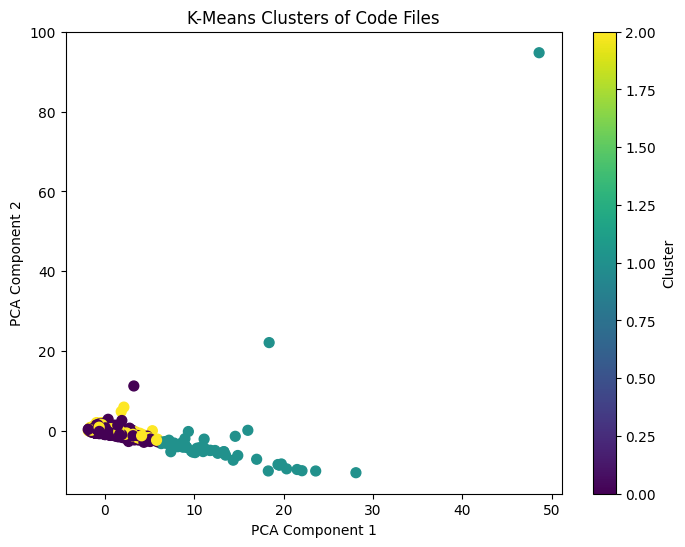

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=50)
plt.title("K-Means Clusters of Code Files")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [12]:
df['cluster'] = labels_kmeans
print(df['cluster'].value_counts())


cluster
0    2841
2    1087
1      61
Name: count, dtype: int64


In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

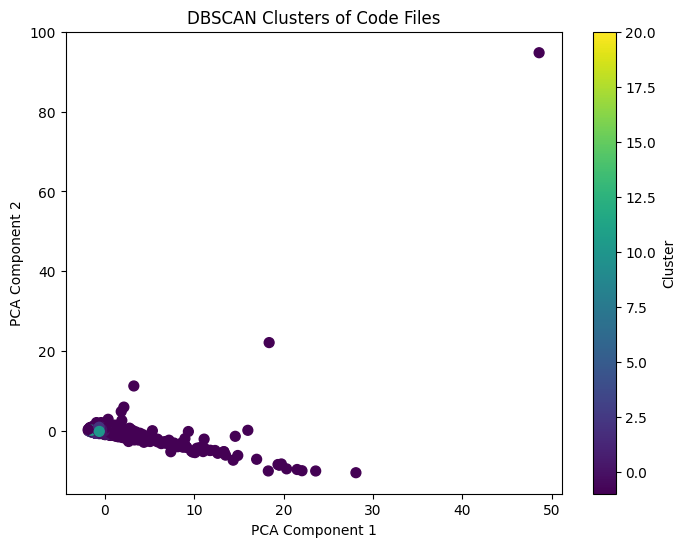

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='viridis', s=50)
plt.title("DBSCAN Clusters of Code Files")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [15]:
df['cluster'] = labels_dbscan
print(df['cluster'].value_counts())


cluster
-1     1963
 0     1224
 1      287
 2      284
 4       74
 6       49
 7       13
 11      11
 18      10
 9        9
 10       7
 12       6
 5        6
 8        6
 3        6
 13       5
 14       5
 17       5
 15       5
 16       5
 19       5
 20       4
Name: count, dtype: int64


In [ ]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.mdl']